In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [145]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (2).csv


In [146]:
data=pd.read_csv("Company_Data.csv")

In [147]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [148]:
data['Sales'].agg(['max', 'min'])

max    16.27
min     0.00
Name: Sales, dtype: float64

In [149]:
#The maximum and minimum value of the Sales is 16.27 and 0.00
#we will have to divide this into categories. High and Low,
#0-7 ----> Low Sales
#8-16-----> High Sales

In [150]:
da=pd.DataFrame( data['Sales'])

In [151]:
da["Sale_Category"] = pd.cut(data["Sales"], 2,
                                labels=["Low", "High"])

In [152]:
da.tail()

,Sales,Sale_Category
395,12.57,High
396,6.14,Low
397,7.41,Low
398,5.94,Low
399,9.71,High


In [153]:
data["Sale_Category"] = pd.cut(data["Sales"], 2,
                                labels=["Low", "High"])

In [154]:
data.head()

#we have attached the actegorical data into our original data set and let us drop the Sales column

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [155]:
data.Sale_Category.value_counts()

Low     241
High    159
Name: Sale_Category, dtype: int64

In [156]:
data.drop(['Sales'], axis=1, inplace=True)
#we have droped sales column

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CompPrice      400 non-null    int64   
 1   Income         400 non-null    int64   
 2   Advertising    400 non-null    int64   
 3   Population     400 non-null    int64   
 4   Price          400 non-null    int64   
 5   ShelveLoc      400 non-null    object  
 6   Age            400 non-null    int64   
 7   Education      400 non-null    int64   
 8   Urban          400 non-null    object  
 9   US             400 non-null    object  
 10  Sale_Category  400 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [158]:
data.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [159]:
data.duplicated().sum()

0

In [160]:
data.isnull().sum()

CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
ShelveLoc        0
Age              0
Education        0
Urban            0
US               0
Sale_Category    0
dtype: int64

In [161]:
from sklearn.preprocessing import LabelEncoder
encoded=LabelEncoder()
data[['ShelveLoc', 'Urban', 'US', 'Sale_Category']]=data[['ShelveLoc', 'Urban', 'US', 'Sale_Category']].apply(LabelEncoder().fit_transform)
data.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale_Category
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0


In [162]:
data.Sale_Category.value_counts()

#here 241---->LOW sales
#159------>High sales

1    241
0    159
Name: Sale_Category, dtype: int64

In [163]:
data.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale_Category
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,-0.061699
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,-0.169508
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,-0.278446
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,-0.032292
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,0.338176
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,-0.111123
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,0.201522
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,0.006051
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,0.068275
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000,-0.186239


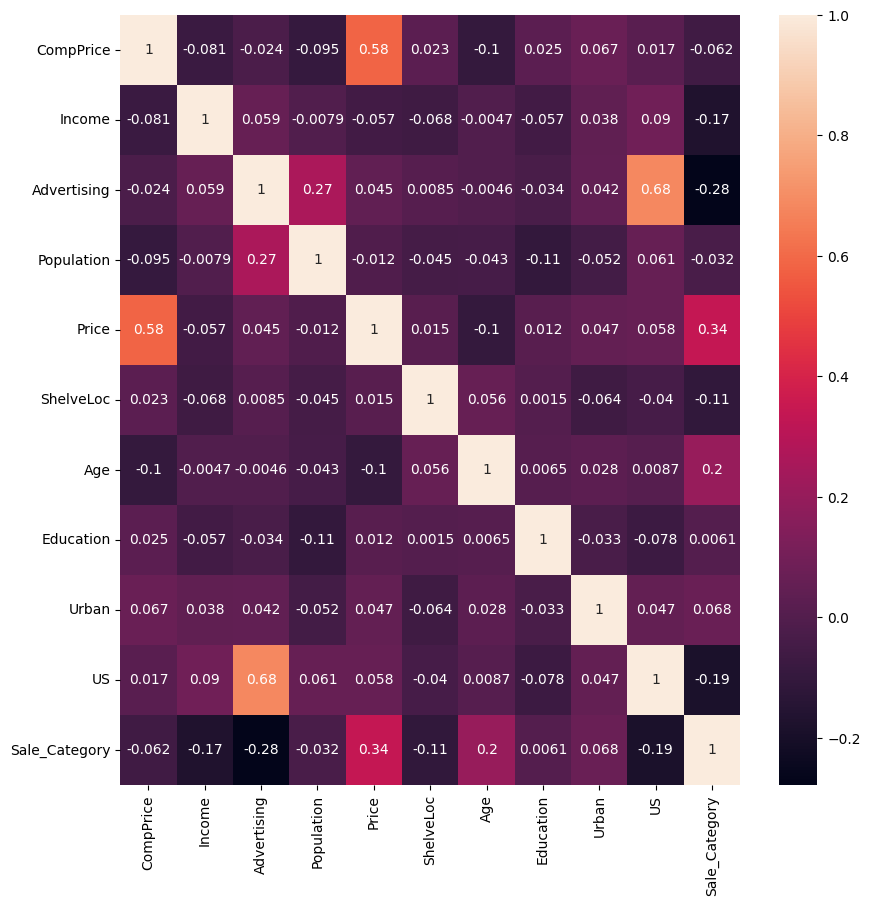

In [164]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

#if we check the correlation of other attribute with sales, Price has negative moderate correlation with sale.
#Sale is 44% dependent on Price and 27% dependent on Advertising  and 23% dependent on Age
#remaining columns have weak correlation
#we have colinearity here as the independent variable are dependent on each other(compPrice & Price, Advertising &US)


In [165]:
X=data.iloc[:,0:10]
Y=data['Sale_Category']

In [166]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [167]:
#let us normalizing our data, if we use MinMax scaler all the values will be in between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [168]:
X=pd.DataFrame(X)
X.columns=['CompPrice'	,'Income'	,'Advertising'	,'Population',	'Price',	'ShelveLoc'	,'Age',	'Education',	'Urban',	'US']
X.head()

#we have our scaled data for X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0


In [210]:
Y.head()

0    0
1    0
2    0
3    1
4    1
Name: Sale_Category, dtype: int64

In [169]:
from sklearn.model_selection import train_test_split

In [211]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((320, 10), (80, 10), (320,), (80,))

In [212]:
from sklearn.metrics import mean_squared_error

In [213]:
#Let us build the model

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [246]:
model=DecisionTreeClassifier(max_depth=7, criterion='entropy')
model.fit(X_train.values, Y_train.values)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [247]:
#For train data

In [248]:
train_pred=model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [249]:
confusion_matrix(Y_train, train_pred)
#24 are miss classified

array([[120,   3],
       [ 21, 176]])

In [250]:
print(classification_report(Y_train, train_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       123
           1       0.98      0.89      0.94       197

    accuracy                           0.93       320
   macro avg       0.92      0.93      0.92       320
weighted avg       0.93      0.93      0.93       320



In [251]:
#accuracy of our model is 93%

In [252]:
train_mse=mean_squared_error(Y_train, train_pred)  ##mse
train_mse

0.075

In [254]:
#For test data

In [255]:
test_pred=model.predict(X_test)
test_mse=mean_squared_error(Y_test, test_pred)
test_rmse=np.sqrt(test_mse)
print(test_mse, test_rmse)

0.25 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [257]:
confusion_matrix(Y_test, test_pred)
#20 are miss classified

array([[28,  8],
       [12, 32]])

In [259]:
print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        36
           1       0.80      0.73      0.76        44

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.76      0.75      0.75        80



In [ ]:
#We are getting 75% accuracy for the test data

In [258]:
print("Train mse:", train_mse,'            Test mse:', test_mse)

Train mse: 0.075             Test mse: 0.25


In [181]:
#we can observe the training error is 0.07 and the testing error is 0.25

In [260]:
#Let us Vizualize

In [261]:
from sklearn.tree import plot_tree

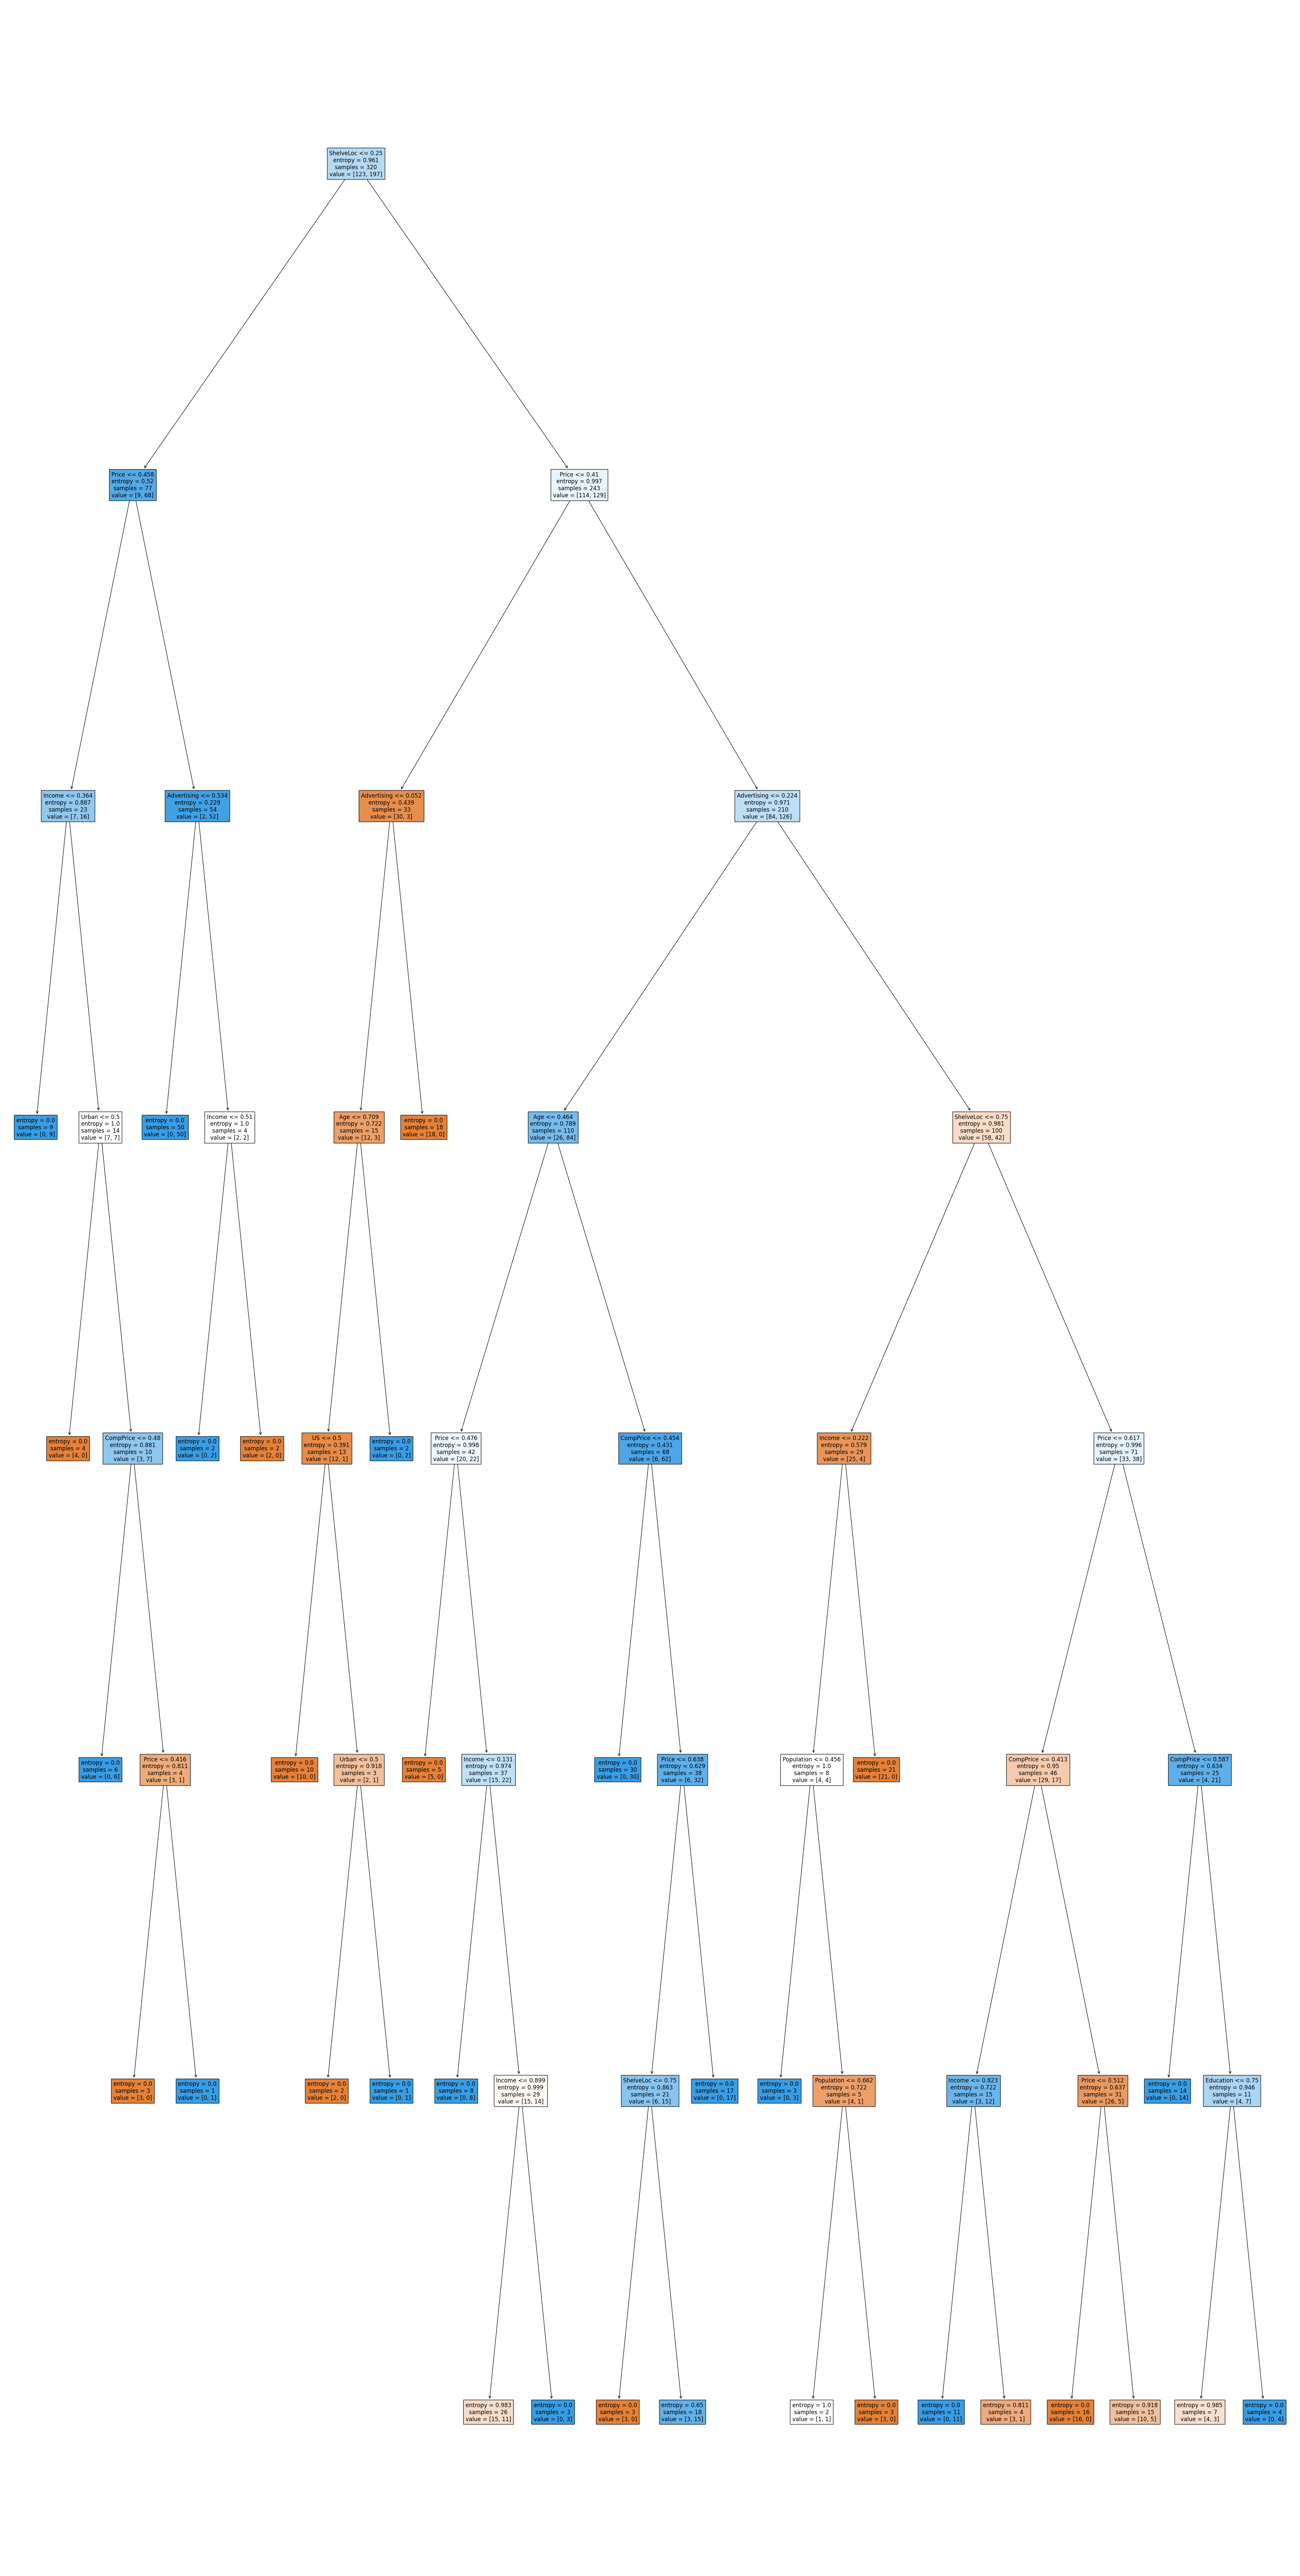

In [320]:

plt.figure(figsize=(50,100))
plot_tree(model, feature_names=data.columns, filled=True)
plt.show()

Decision Tree using Gini criterion (CRT)

In [298]:
clf=DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, criterion='gini')

In [299]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

In [300]:
train_pred=clf.predict(X_train)

In [301]:
confusion_matrix(Y_train, train_pred)

array([[ 81,  42],
       [ 12, 185]])

In [302]:
print(classification_report(Y_train, train_pred))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       123
           1       0.81      0.94      0.87       197

    accuracy                           0.83       320
   macro avg       0.84      0.80      0.81       320
weighted avg       0.84      0.83      0.83       320



In [ ]:
#here we are getting an accuracy of 83% for train data set

In [303]:
pred=clf.predict(X_test)

In [304]:
confusion_matrix(Y_test, pred)

array([[22, 14],
       [ 4, 40]])

In [305]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        36
           1       0.74      0.91      0.82        44

    accuracy                           0.78        80
   macro avg       0.79      0.76      0.76        80
weighted avg       0.79      0.78      0.77        80



In [ ]:
#For test data set we are getting an accuracy score of 78%

Grid search cv

In [306]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

mod=DecisionTreeClassifier()

param_grid = [{'max_depth':[3,4,5,6,7],'criterion':['gini','entropy'], 'max_leaf_nodes':[5,6,7,8] }]
gsv=GridSearchCV(mod,param_grid, cv=10, verbose=300)


In [307]:
gsv.fit(X_train, Y_train)


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 1/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.656 total time=   0.0s
[CV 2/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 2/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.594 total time=   0.0s
[CV 3/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 3/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.688 total time=   0.0s
[CV 4/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 4/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.594 total time=   0.0s
[CV 5/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 5/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.625 total time=   0.0s
[CV 6/10; 1/40] START criterion=gini,

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 4, 5, 6, 7],
                          'max_leaf_nodes': [5, 6, 7, 8]}],
             verbose=300)

In [308]:
gsv.best_params_, gsv.best_score_

({'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 8}, 0.70625)

In [309]:
#Let us build our model with these parameters

In [310]:
clf_new=DecisionTreeClassifier(max_depth=6, max_leaf_nodes=8, criterion='entropy')

In [311]:
clf_new.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=8)

In [312]:
train_pred1=clf.predict(X_train) #prediction for X training data can be taken as y^

In [313]:
confusion_matrix(Y_train, train_pred1)

array([[ 81,  42],
       [ 12, 185]])

In [314]:
print(classification_report(Y_train, train_pred1))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       123
           1       0.81      0.94      0.87       197

    accuracy                           0.83       320
   macro avg       0.84      0.80      0.81       320
weighted avg       0.84      0.83      0.83       320



In [ ]:
#we got the accuracy of 83% for train data

In [315]:
test_pred1=clf.predict(X_test)

In [316]:
confusion_matrix(Y_test, test_pred1)

array([[22, 14],
       [ 4, 40]])

In [317]:
print(classification_report(Y_test, test_pred1))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        36
           1       0.74      0.91      0.82        44

    accuracy                           0.78        80
   macro avg       0.79      0.76      0.76        80
weighted avg       0.79      0.78      0.77        80



In [ ]:
#we got the testing accuracy as 78%

In [318]:
#Vizualization

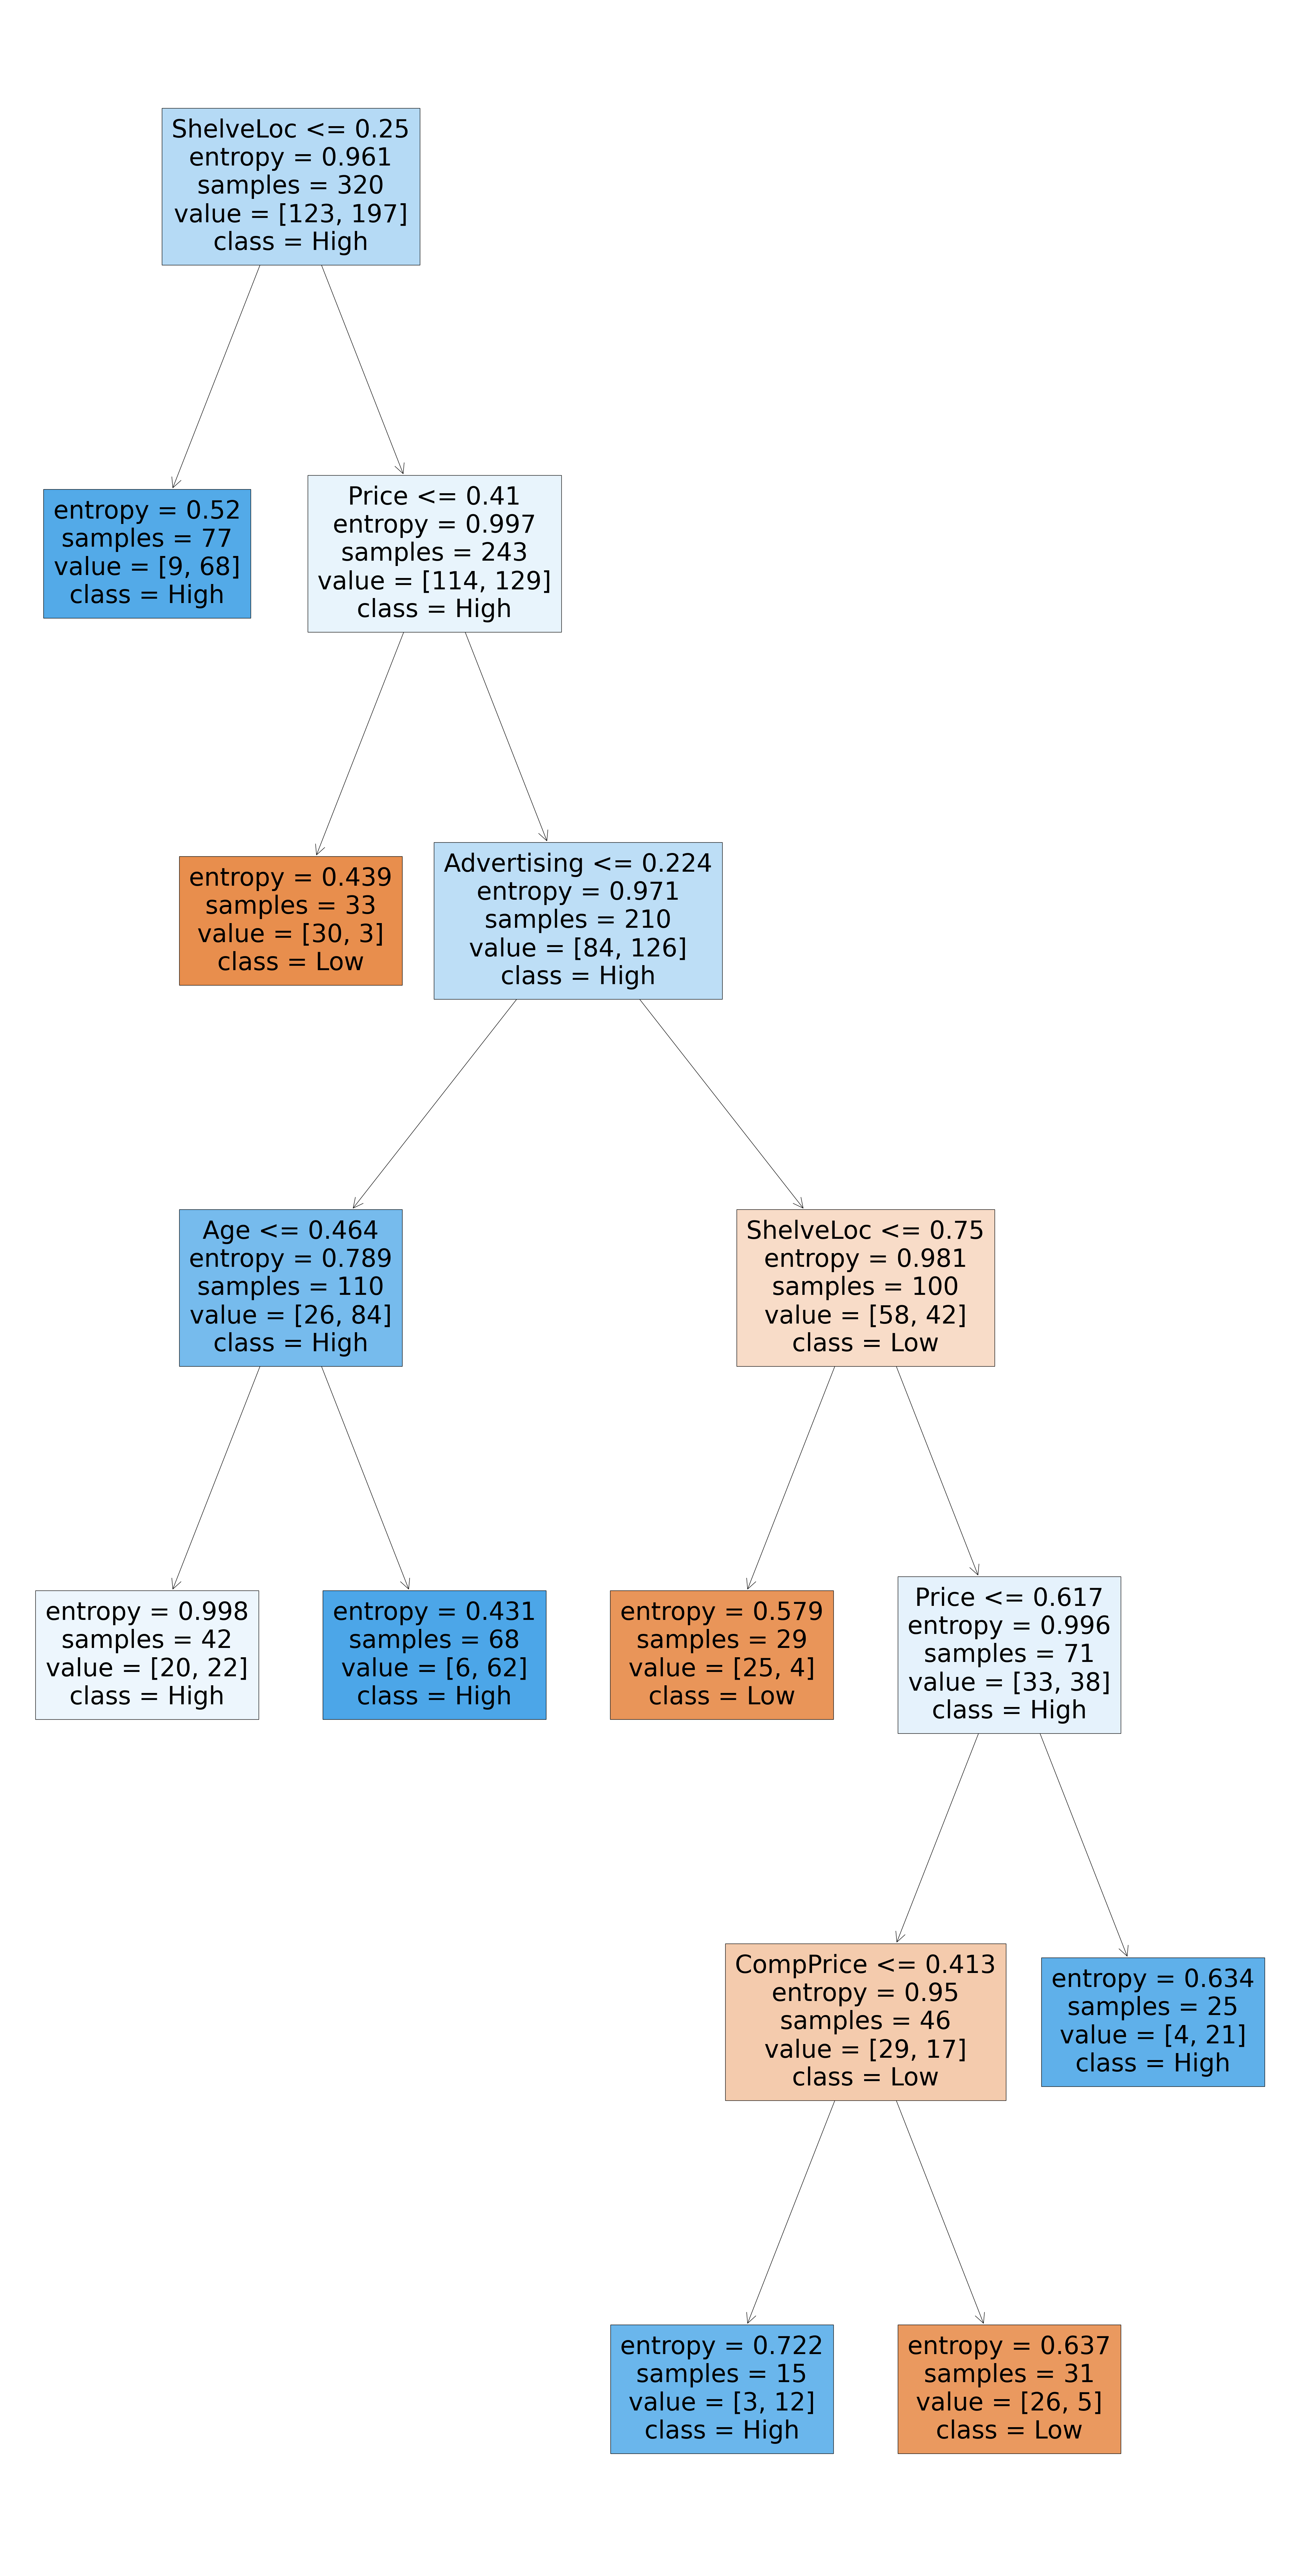

In [322]:
plt.figure(figsize=(50,100))
cnames=['Low','High']
plot_tree(clf_new,class_names=cnames, feature_names=data.columns, filled=True)
plt.show()

RANDOMFOREST

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [324]:
#let us use gridsearchCv and confirm the values
modd=RandomForestClassifier()
param_grid=[{'n_estimators':[80,90,100,200], 'max_features':[2,3,4,5,6]}]
gsv1=GridSearchCV(modd, param_grid, cv=10, verbose=100)

In [325]:
gsv1.fit(X_train, Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 1/10; 1/20] END max_features=2, n_estimators=80;, score=0.750 total time=   0.1s
[CV 2/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 2/10; 1/20] END max_features=2, n_estimators=80;, score=0.781 total time=   0.1s
[CV 3/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 3/10; 1/20] END max_features=2, n_estimators=80;, score=0.781 total time=   0.1s
[CV 4/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 4/10; 1/20] END max_features=2, n_estimators=80;, score=0.781 total time=   0.1s
[CV 5/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 5/10; 1/20] END max_features=2, n_estimators=80;, score=0.812 total time=   0.1s
[CV 6/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 6/10; 1/20] END max_fe

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [80, 90, 100, 200]}],
             verbose=100)

In [326]:
gsv1.best_params_, gsv1.best_score_

({'max_features': 5, 'n_estimators': 80}, 0.803125)

In [202]:
#let us build RandomForest model with these parameters

In [351]:
model_rf=RandomForestClassifier(n_estimators=30, max_features=5)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=30)

In [352]:
tr_pred=model_rf.predict(X_train)
te_pred=model_rf.predict(X_test)

In [353]:
kfold=KFold(n_splits=10, random_state=7, shuffle=True)

In [354]:
results=cross_val_score(model_rf, X, Y, cv=kfold)
print(results.mean())

0.8174999999999999


In [355]:
tr_pred=model_rf.predict(X_train)

In [356]:
confusion_matrix(Y_train, tr_pred)
#there are 0 misclassification

array([[123,   0],
       [  0, 197]])

In [357]:
print(classification_report( tr_pred, Y_train,))
#accuracy is very high

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       197

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [358]:
#we got the accuracy as 100% for training data

In [359]:
accuracy_score(Y_train, tr_pred)

1.0

In [360]:
te_pred=model_rf.predict(X_test)
confusion_matrix(Y_test, te_pred)

array([[26, 10],
       [ 6, 38]])

In [361]:
#there are 18 mis classification

In [362]:
print(classification_report(Y_test, te_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        36
           1       0.79      0.86      0.83        44

    accuracy                           0.80        80
   macro avg       0.80      0.79      0.80        80
weighted avg       0.80      0.80      0.80        80



In [363]:
#we got the accuracy of 80% for the test data